In [1]:
import numpy as np
import pandas as pd

In [2]:
cust = pd.read_excel(r'C:\Users\anish\Downloads\RFM\CUSTOMER_DETAILS.xlsx')

In [3]:
prod = pd.read_excel(r'C:\Users\anish\Downloads\RFM\PRODUCT_DETAILS.xlsx')

In [4]:
loc = pd.read_excel(r'C:\Users\anish\Downloads\RFM\LOCATIONS_DETAILS.xlsx')

In [5]:
df1 = pd.merge(cust, prod, left_index = True, right_index = True, on = 'User_ID')

In [6]:
df1.head()

,User_ID,Gender,Age,Occupation,Product_ID,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,F,0-17,10,P00069042,3,NaN,NaN,8370
1,1000001,F,0-17,10,P00248942,1,6.0,14.0,15200
2,1000001,F,0-17,10,P00087842,12,NaN,NaN,1422
3,1000001,F,0-17,10,P00085442,12,14.0,NaN,1057
4,1000002,M,55+,16,P00285442,8,NaN,NaN,7969


In [7]:
df1.shape

(537577, 9)

In [8]:
df1 = pd.merge(df1, loc, left_index = True, right_index = True, on = 'User_ID')

In [9]:
df1.head()

,User_ID,Gender,Age,Occupation,Product_ID,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,City_Category,Stay_In_Current_City_Years
0,1000001,F,0-17,10,P00069042,3,NaN,NaN,8370,A,2
1,1000001,F,0-17,10,P00248942,1,6.0,14.0,15200,A,2
2,1000001,F,0-17,10,P00087842,12,NaN,NaN,1422,A,2
3,1000001,F,0-17,10,P00085442,12,14.0,NaN,1057,A,2
4,1000002,M,55+,16,P00285442,8,NaN,NaN,7969,C,4+


In [10]:
df2 = df1.drop(['Product_Category_3'],1)

In [11]:
df2.head()

,User_ID,Gender,Age,Occupation,Product_ID,Product_Category_1,Product_Category_2,Purchase,City_Category,Stay_In_Current_City_Years
0,1000001,F,0-17,10,P00069042,3,NaN,8370,A,2
1,1000001,F,0-17,10,P00248942,1,6.0,15200,A,2
2,1000001,F,0-17,10,P00087842,12,NaN,1422,A,2
3,1000001,F,0-17,10,P00085442,12,14.0,1057,A,2
4,1000002,M,55+,16,P00285442,8,NaN,7969,C,4+


In [12]:
df2.isnull().sum()

User_ID                            0
Gender                             0
Age                                0
Occupation                         0
Product_ID                         0
Product_Category_1                 0
Product_Category_2            166986
Purchase                           0
City_Category                      0
Stay_In_Current_City_Years         0
dtype: int64

In [13]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df2['Gender'] = le.fit_transform(df2['Gender'])
df2['City_Category'] = le.fit_transform(df2['City_Category'])
df2['Age'] = le.fit_transform(df2['Age'])
#df2['Stay_In_Current_City_Years'] = le.fit_transform(df2['Stay_In_Current_City_Years'])

In [14]:
df2['Stay_In_Current_City_Years'].replace('4+', 4, inplace = True)

In [15]:
df2.head()

,User_ID,Gender,Age,Occupation,Product_ID,Product_Category_1,Product_Category_2,Purchase,City_Category,Stay_In_Current_City_Years
0,1000001,0,0,10,P00069042,3,NaN,8370,0,2
1,1000001,0,0,10,P00248942,1,6.0,15200,0,2
2,1000001,0,0,10,P00087842,12,NaN,1422,0,2
3,1000001,0,0,10,P00085442,12,14.0,1057,0,2
4,1000002,1,6,16,P00285442,8,NaN,7969,2,4


In [16]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     537577 non-null  int64  
 1   Gender                      537577 non-null  int32  
 2   Age                         537577 non-null  int32  
 3   Occupation                  537577 non-null  int64  
 4   Product_ID                  537577 non-null  object 
 5   Product_Category_1          537577 non-null  int64  
 6   Product_Category_2          370591 non-null  float64
 7   Purchase                    537577 non-null  int64  
 8   City_Category               537577 non-null  int32  
 9   Stay_In_Current_City_Years  537577 non-null  int64  
dtypes: float64(1), int32(3), int64(5), object(1)
memory usage: 34.9+ MB


In [17]:
import seaborn as sns

<AxesSubplot:xlabel='Gender', ylabel='count'>

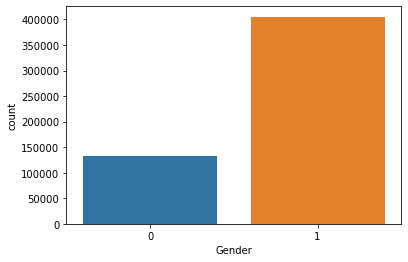

In [18]:
sns.countplot(x = 'Gender', data = df2)

<AxesSubplot:xlabel='Age', ylabel='count'>

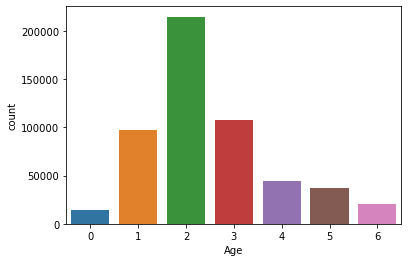

In [19]:
sns.countplot(x = 'Age', data = df2)

In [20]:
cust['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

Most of the customers are between the age group 26 t0 45

In [21]:
df3 = df2.groupby(["Product_ID"])['Purchase'].aggregate(np.sum).reset_index().sort_values('Purchase',ascending = False).head(100)
df3

,Product_ID,Purchase
249,P00025442,27532426
1014,P00110742,26382569
2441,P00255842,24652442
1743,P00184942,24060871
581,P00059442,23948299
...,...,...
1324,P00142142,8293846
334,P00034042,8274454
1012,P00110542,8255990
280,P00028542,8142138


In [22]:
df2['City_Category'].value_counts()
cust_in_city = pd.DataFrame({'Count' : df2.groupby(["City_Category","User_ID"]).size()}).reset_index()
cust_in_city.shape

(5891, 3)

C:\Users\anish\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='City_Category', ylabel='Count'>

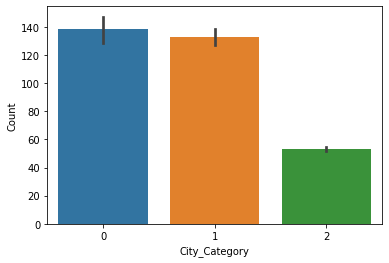

In [23]:
sns.barplot('City_Category', 'Count', data=cust_in_city)

In [24]:
df2.groupby(["User_ID"])['Purchase'].aggregate(np.sum).reset_index().sort_values('Purchase',ascending = False).head(30)


,User_ID,Purchase
4166,1004277,10536783
1634,1001680,8699232
2831,1002909,7577505
1885,1001941,6817493
416,1000424,6573609
4335,1004448,6565878
981,1001015,6511302
3297,1003391,6476786
1142,1001181,6387899
534,1000549,6310604


In [25]:
df2.groupby(["Gender"])['Purchase'].aggregate(np.sum).reset_index().sort_values('Purchase',ascending = False)


,Gender,Purchase
1,1,3853044357
0,0,1164624021


In [26]:
df2.groupby(["Age"])['Purchase'].aggregate(np.sum).reset_index().sort_values('Purchase',ascending = False)


,Age,Purchase
2,2,1999749106
3,3,1010649565
1,1,901669280
4,4,413418223
5,5,361908356
6,6,197614842
0,0,132659006


In [27]:

df2.groupby(["City_Category"])['Purchase'].aggregate(np.sum).reset_index().sort_values('Purchase',ascending = False)

,City_Category,Purchase
1,1,2083431612
2,2,1638567969
0,0,1295668797


In [28]:
df2.groupby(["Product_Category_1"])['Purchase'].aggregate(np.sum).reset_index().sort_values('Purchase',ascending = False)

,Product_Category_1,Purchase
0,1,1882666325
4,5,926917497
7,8,840693394
5,6,319355286
1,2,264497242
2,3,200412211
15,16,143168035
10,11,112203088
9,10,99029631
14,15,91658147


In [29]:
pd.crosstab(df2['Product_ID'], df2['Product_Category_1'])

Product_Category_1,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
Product_ID,,,,,,,,,,,,,,,,,,
P00000142,0,0,1130,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
P00000242,0,371,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
P00000342,0,0,0,0,238,0,0,0,0,0,0,0,0,0,0,0,0,0
P00000442,0,0,0,0,92,0,0,0,0,0,0,0,0,0,0,0,0,0
P00000542,0,0,0,0,146,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
P0099442,0,0,0,0,0,196,0,0,0,0,0,0,0,0,0,0,0,0
P0099642,0,0,0,0,0,0,0,13,0,0,0,0,0,0,0,0,0,0
P0099742,0,0,123,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


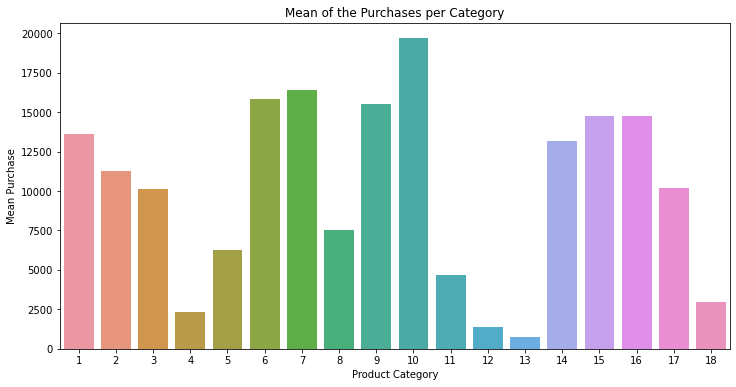

In [30]:
import matplotlib.pyplot as plt

category = []
mean_purchase = []


for i in df2['Product_Category_1'].unique():
    category.append(i)
category.sort()

for e in category:
    mean_purchase.append(df2[df2['Product_Category_1']==e]['Purchase'].mean())

plt.figure(figsize=(12,6))

sns.barplot(x=category,y=mean_purchase)
plt.title('Mean of the Purchases per Category')
plt.xlabel('Product Category')
plt.ylabel('Mean Purchase')
plt.show()

In [31]:
df2.groupby(["Occupation"])['Purchase'].aggregate(np.sum).reset_index().sort_values('Purchase',ascending = False)

,Occupation,Purchase
4,4,657530393
0,0,625814811
7,7,549282744
1,1,414552829
17,17,387240355
12,12,300672105
20,20,292276985
14,14,255594745
16,16,234442330
2,2,233275393


In [32]:
frequency = df2['Product_ID'].value_counts()
frequency=frequency.sort_index()

In [33]:
rfm=pd.DataFrame()

In [34]:
rfm['fre']=frequency

In [35]:
monetary = df2.groupby('Product_ID').Purchase.mean()
monetary = monetary.sort_index()
monetary

Product_ID
P00000142    11143.507080
P00000242    10552.293801
P00000342     5299.928571
P00000442     4795.358696
P00000542     5419.308219
                 ...     
P0099442     14353.642857
P0099642      6439.230769
P0099742      7862.373984
P0099842      7213.340000
P0099942      5449.461538
Name: Purchase, Length: 3623, dtype: float64

In [36]:
rfm['mon'] = monetary

In [37]:
rfm

,fre,mon
P00000142,1130,11143.507080
P00000242,371,10552.293801
P00000342,238,5299.928571
P00000442,92,4795.358696
P00000542,146,5419.308219
...,...,...
P0099442,196,14353.642857
P0099642,13,6439.230769
P0099742,123,7862.373984
P0099842,100,7213.340000


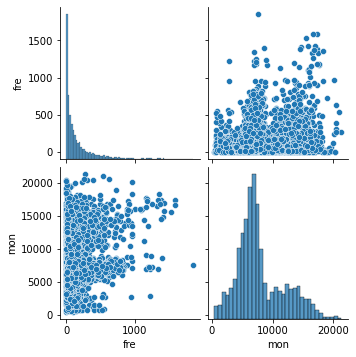

In [38]:
sns.pairplot(rfm)

In [39]:
frequency_cust = df2['User_ID'].value_counts()
frequency_cust = frequency_cust.sort_index()
frequency_cust

1000001     34
1000002     76
1000003     29
1000004     13
1000005    106
          ... 
1006036    476
1006037    116
1006038     10
1006039     67
1006040    169
Name: User_ID, Length: 5891, dtype: int64

In [40]:
monetary_cust = df2.groupby('User_ID').Purchase.mean()
monetary_cust = monetary_cust.sort_index()
monetary_cust

User_ID
1000001     9808.264706
1000002    10662.539474
1000003    11780.517241
1000004    15845.153846
1000005     7745.292453
               ...     
1006036     8028.710084
1006037     9267.560345
1006038     8085.900000
1006039     8276.179104
1006040     9246.242604
Name: Purchase, Length: 5891, dtype: float64

In [41]:
rfm1 = pd.DataFrame()

In [42]:
rfm1['fre_cust'] = frequency_cust

In [43]:
rfm1['mon_cust'] = monetary_cust

In [44]:
rfm1

,fre_cust,mon_cust
1000001,34,9808.264706
1000002,76,10662.539474
1000003,29,11780.517241
1000004,13,15845.153846
1000005,106,7745.292453
...,...,...
1006036,476,8028.710084
1006037,116,9267.560345
1006038,10,8085.900000
1006039,67,8276.179104


In [45]:
df2['Product_Category_2'].value_counts()

8.0     63058
14.0    54158
2.0     48481
16.0    42602
15.0    37317
5.0     25874
4.0     25225
6.0     16251
11.0    13945
17.0    13130
13.0    10369
9.0      5591
12.0     5419
10.0     2991
3.0      2835
18.0     2730
7.0       615
Name: Product_Category_2, dtype: int64

In [46]:
df1[(df1['Product_Category_1']==1)].Product_Category_2.value_counts()

2.0     48481
15.0    18281
8.0     15251
16.0    14602
5.0     11127
6.0     10507
11.0     4761
14.0     4496
17.0     1842
13.0     1008
18.0      705
4.0       676
3.0       118
Name: Product_Category_2, dtype: int64

In [47]:
pd.crosstab(df2['Product_Category_1'], df2['Product_Category_2'])

Product_Category_2,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0
Product_Category_1,,,,,,,,,,,,,,,,,
1,48481,118,676,11127,10507,0,15251,0,0,4761,0,1008,4496,18281,14602,1842,705
2,0,2717,7997,4099,185,0,2577,1488,0,0,142,0,482,1328,530,868,176
3,0,0,16552,2225,0,0,0,0,0,0,586,25,0,228,0,0,0
4,0,0,0,8423,0,0,2141,453,0,113,182,0,0,113,0,0,0
5,0,0,0,0,5559,615,31115,3234,2,6712,2830,1354,25147,5582,862,1474,1318
6,0,0,0,0,0,0,11890,0,2598,709,0,39,0,0,3949,0,0
7,0,0,0,0,0,0,84,0,0,0,117,0,0,0,0,96,0
8,0,0,0,0,0,0,0,416,391,1649,1562,4954,20412,4250,10349,7823,498
9,0,0,0,0,0,0,0,0,0,0,0,0,0,403,0,0,0


In [48]:
rfm['mon'].sort_values(ascending = False).head(100)

P00086242    21297.865672
P00085342    20993.804428
P00200642    20479.229885
P00116142    20478.264753
P00119342    20454.296053
                 ...     
P00114342    16522.787313
P00121342    16491.038718
P00115842    16479.630653
P00201842    16459.000000
P00106842    16453.000000
Name: mon, Length: 100, dtype: float64

In [49]:
rfm['mon'].sort_values().head(100)

P00091742     405.000000
P00041442     455.540816
P00293442     478.500000
P00063242     498.000000
P00273842     524.666667
                ...     
P00063442    1866.000000
P00183742    1874.383333
P00290842    1876.500000
P00082442    1879.611111
P00005342    1881.307692
Name: mon, Length: 100, dtype: float64

In [50]:
df2.columns

Index(['User_ID', 'Gender', 'Age', 'Occupation', 'Product_ID',
       'Product_Category_1', 'Product_Category_2', 'Purchase', 'City_Category',
       'Stay_In_Current_City_Years'],
      dtype='object')

In [51]:
from sklearn.cluster import DBSCAN
from sklearn import metrics

In [52]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     537577 non-null  int64  
 1   Gender                      537577 non-null  object 
 2   Age                         537577 non-null  object 
 3   Occupation                  537577 non-null  int64  
 4   Product_ID                  537577 non-null  object 
 5   Product_Category_1          537577 non-null  int64  
 6   Product_Category_2          370591 non-null  float64
 7   Product_Category_3          164278 non-null  float64
 8   Purchase                    537577 non-null  int64  
 9   City_Category               537577 non-null  object 
 10  Stay_In_Current_City_Years  537577 non-null  object 
dtypes: float64(2), int64(4), object(5)
memory usage: 45.1+ MB


In [53]:
df1['Occupation'] = df1['Occupation'].apply(str)

In [54]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     537577 non-null  int64  
 1   Gender                      537577 non-null  object 
 2   Age                         537577 non-null  object 
 3   Occupation                  537577 non-null  object 
 4   Product_ID                  537577 non-null  object 
 5   Product_Category_1          537577 non-null  int64  
 6   Product_Category_2          370591 non-null  float64
 7   Product_Category_3          164278 non-null  float64
 8   Purchase                    537577 non-null  int64  
 9   City_Category               537577 non-null  object 
 10  Stay_In_Current_City_Years  537577 non-null  object 
dtypes: float64(2), int64(3), object(6)
memory usage: 45.1+ MB


In [55]:
df4 = df1[['Gender', 'Age', 'Occupation', 'City_Category', 'Stay_In_Current_City_Years']]

In [56]:
df4 = pd.get_dummies(df4, drop_first = True)

df4.head()

In [57]:
df4.head()

,Gender_M,Age_18-25,Age_26-35,Age_36-45,Age_46-50,Age_51-55,Age_55+,Occupation_1,Occupation_10,Occupation_11,...,Occupation_6,Occupation_7,Occupation_8,Occupation_9,City_Category_B,City_Category_C,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1


In [58]:
from sklearn.preprocessing import scale


In [59]:
pd.crosstab(df2['User_ID'], df2['Product_ID']).head()

Product_ID,P00000142,P00000242,P00000342,P00000442,P00000542,P00000642,P00000742,P00000842,P00000942,P00001042,...,P0098942,P0099042,P0099142,P0099242,P0099342,P0099442,P0099642,P0099742,P0099842,P0099942
User_ID,,,,,,,,,,,,,,,,,,,,,
1000001,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1000002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1000003,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1000004,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1000005,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [60]:
import matplotlib.pyplot as plt

C:\Users\anish\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Product_Category_1', ylabel='count'>

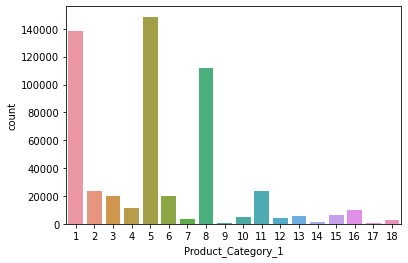

In [61]:
sns.countplot(df2['Product_Category_1'])

<AxesSubplot:xlabel='Product_Category_1'>

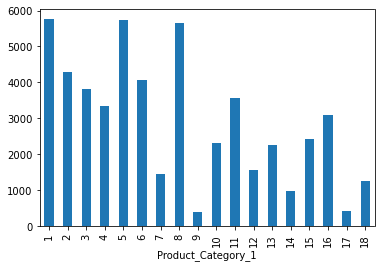

In [62]:
df2.User_ID.groupby(df2.Product_Category_1).nunique().plot(kind='bar')

<AxesSubplot:xlabel='Product_Category_1'>

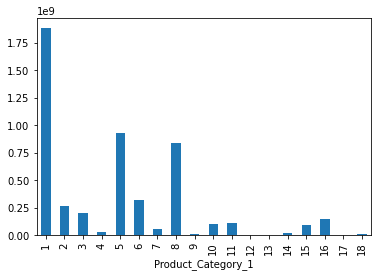

In [63]:
df2.Purchase.groupby(df2.Product_Category_1).sum().plot(kind='bar')

<AxesSubplot:xlabel='Product_Category_1'>

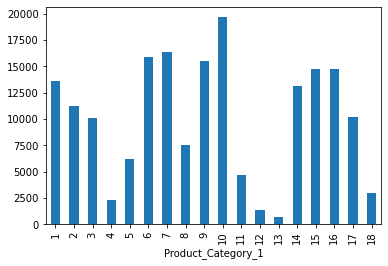

In [64]:
df2.Purchase.groupby(df2.Product_Category_1).mean().plot(kind='bar')

In [65]:
 df2[df2['Product_Category_1']==8]

,User_ID,Gender,Age,Occupation,Product_ID,Product_Category_1,Product_Category_2,Purchase,City_Category,Stay_In_Current_City_Years
4,1000002,1,6,16,P00285442,8,NaN,7969,2,4
9,1000005,1,2,20,P00274942,8,NaN,7871,0,1
11,1000005,1,2,20,P00014542,8,NaN,3957,0,1
12,1000005,1,2,20,P00031342,8,NaN,6073,0,1
21,1000008,1,2,12,P00156442,8,NaN,9872,2,4
...,...,...,...,...,...,...,...,...,...,...
537561,1004736,1,1,20,P00078142,8,16.0,7834,0,1
537563,1004736,1,1,20,P00154642,8,NaN,6074,0,1
537565,1004736,1,1,20,P00051142,8,NaN,7934,0,1
537567,1004736,1,1,20,P00157542,8,14.0,1994,0,1


# Product Clustering

In [66]:
frequency1 = df2['Product_ID'].value_counts()
frequency1=frequency1.sort_index()

In [67]:
monetary1 = df2.groupby('Product_ID').Purchase.mean()
monetary1 = monetary1.sort_index()
monetary1

Product_ID
P00000142    11143.507080
P00000242    10552.293801
P00000342     5299.928571
P00000442     4795.358696
P00000542     5419.308219
                 ...     
P0099442     14353.642857
P0099642      6439.230769
P0099742      7862.373984
P0099842      7213.340000
P0099942      5449.461538
Name: Purchase, Length: 3623, dtype: float64

In [68]:
fm = pd.DataFrame()

In [69]:
fm['frequency'] = frequency1

In [70]:
fm['monetary'] = monetary1

In [71]:
fm.head()

,frequency,monetary
P00000142,1130,11143.507080
P00000242,371,10552.293801
P00000342,238,5299.928571
P00000442,92,4795.358696
P00000542,146,5419.308219


In [72]:
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
fm1 = pd.DataFrame(standard_scaler.fit_transform(fm), columns = ['fre','mon'])
fm1

,fre,mon
0,4.715976,0.842877
1,1.069532,0.689921
2,0.430564,-0.668948
3,-0.270860,-0.799488
4,-0.011429,-0.638063
...,...,...
3618,0.228784,1.673389
3619,-0.650398,-0.374193
3620,-0.121928,-0.006004
3621,-0.232426,-0.173919


In [73]:
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_samples, silhouette_score

silhouette score 0.5071154716978353 number of clusters are: 2
silhouette score 0.5275690887605222 number of clusters are: 3
silhouette score 0.4850206872413089 number of clusters are: 4
silhouette score 0.38951257443689336 number of clusters are: 5
silhouette score 0.397232500617532 number of clusters are: 6
silhouette score 0.41942696030668164 number of clusters are: 7
silhouette score 0.4143150883396395 number of clusters are: 8
silhouette score 0.41613271042406164 number of clusters are: 9
silhouette score 0.4034843118215222 number of clusters are: 10
silhouette score 0.3803198345620017 number of clusters are: 11
silhouette score 0.3830353373906742 number of clusters are: 12
silhouette score 0.38346111405507766 number of clusters are: 13
silhouette score 0.3815042133862331 number of clusters are: 14
silhouette score 0.38844891132592113 number of clusters are: 15
silhouette score 0.3780964763155269 number of clusters are: 16
silhouette score 0.38159139731312125 number of clusters are

([<matplotlib.axis.XTick at 0x21231ef0580>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

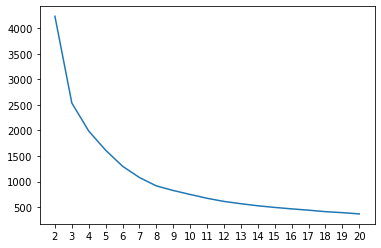

In [74]:
k=range(2,21)
ssd = []
for num_clusters in list(range(2,21)):
    model_clus = KMeans(n_clusters = num_clusters, max_iter=50)
    model_clus.fit(fm1)
    sil_score=silhouette_score(fm1,model_clus.labels_)
    print("silhouette score",sil_score,"number of clusters are:",num_clusters)
    ssd.append(model_clus.inertia_)

plt.plot(k,ssd)
plt.xticks(k)

In [75]:
k = 3
kmeans = KMeans(n_clusters=k)
kmeans.fit(fm1)

KMeans(n_clusters=3)

In [76]:
labels = kmeans.labels_
fm1["cluster"]=labels

C:\Users\anish\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


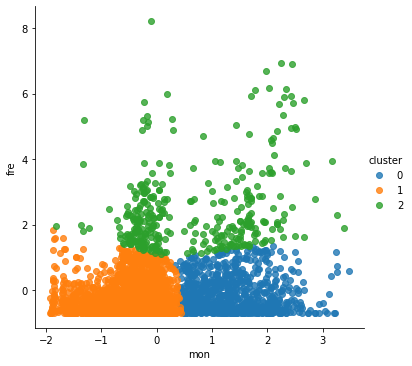

In [77]:
sns.lmplot('mon','fre', data=fm1, hue = 'cluster', fit_reg = False)

In [78]:
kmeans.inertia_

2536.6526524788815

In [79]:
fm['Cluster'] = labels

In [80]:
fm.head()

,frequency,monetary,Cluster
P00000142,1130,11143.507080,2
P00000242,371,10552.293801,0
P00000342,238,5299.928571,1
P00000442,92,4795.358696,1
P00000542,146,5419.308219,1


<AxesSubplot:xlabel='Cluster', ylabel='monetary'>

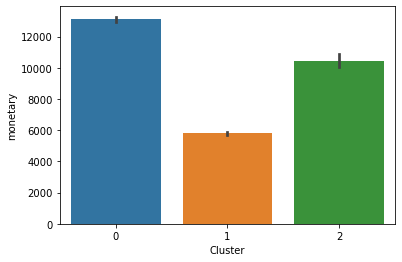

In [81]:
sns.barplot(x=fm.Cluster, y=fm.monetary)

<AxesSubplot:xlabel='Cluster', ylabel='frequency'>

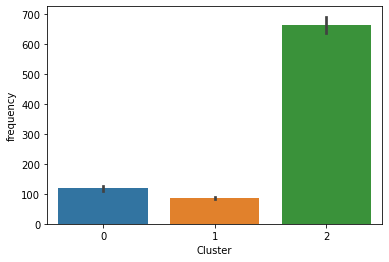

In [82]:
sns.barplot(x=fm.Cluster, y=fm.frequency)

In [83]:
fm['Cluster'].unique()

array([2, 0, 1])

In [84]:
fm_clust_2 = fm[fm['Cluster'] == 2]

In [85]:
fm_clust_1 = fm[fm['Cluster'] == 1]

In [86]:
fm_clust_0 = fm[fm['Cluster'] == 0]

In [87]:
fm_clust_1.index

Index(['P00000342', 'P00000442', 'P00000542', 'P00000742', 'P00001242',
       'P00001342', 'P00001442', 'P00001542', 'P00001642', 'P00001942',
       ...
       'P0098542', 'P0098742', 'P0098942', 'P0099042', 'P0099142', 'P0099242',
       'P0099642', 'P0099742', 'P0099842', 'P0099942'],
      dtype='object', length=2459)

In [88]:
fm_clu=fm.drop(['frequency','monetary'],1)
df2=pd.merge(df2,fm_clu,left_on='Product_ID',right_index=True)

In [89]:
df2.head()

,User_ID,Gender,Age,Occupation,Product_ID,Product_Category_1,Product_Category_2,Purchase,City_Category,Stay_In_Current_City_Years,Cluster
0,1000001,0,0,10,P00069042,3,NaN,8370,0,2,0
825,1000149,1,2,1,P00069042,3,NaN,10715,1,2,0
3314,1000541,0,1,4,P00069042,3,NaN,11037,2,3,0
4224,1000698,1,1,4,P00069042,3,NaN,8009,0,1,0
5864,1000951,1,4,2,P00069042,3,NaN,13346,1,4,0


<AxesSubplot:xlabel='Cluster', ylabel='Purchase'>

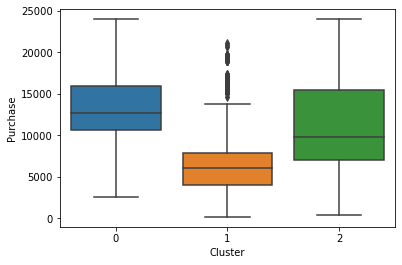

In [90]:
sns.boxplot(x='Cluster', y='Purchase', data=df2)

In [91]:
a_cl=df2.groupby('Cluster')
a0=a_cl.get_group(0)
a1=a_cl.get_group(1)
a2=a_cl.get_group(2)
g1=a0['Purchase']
g2=a2['Purchase']

In [92]:
from scipy.stats import shapiro, mannwhitneyu
print(shapiro(df2.Purchase))
print(mannwhitneyu(g1, g2))

ShapiroResult(statistic=0.949374258518219, pvalue=0.0)
MannwhitneyuResult(statistic=7877510101.0, pvalue=0.0)


C:\Users\anish\anaconda3\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [93]:
df2.groupby(df2.Product_ID).Cluster.mean().value_counts()

1    2459
0     818
2     346
Name: Cluster, dtype: int64

In [94]:
df2.shape

(537577, 11)

In [95]:
df2_clust_2 = df2[df2['Cluster'] == 2]

In [96]:
df2_clust_1 = df2[df2['Cluster'] == 1]

In [97]:
df2_clust_0 = df2[df2['Cluster'] == 0]

In [98]:
df2_clust_2.groupby(["Gender"])['Purchase'].aggregate(np.sum).reset_index().sort_values('Purchase',ascending = False)

,Gender,Purchase
1,1,1934846535
0,0,551525960


In [99]:
df2_clust_1.groupby(["Gender"])['Purchase'].aggregate(np.sum).reset_index().sort_values('Purchase',ascending = False)

,Gender,Purchase
1,1,910898074
0,0,362946350


In [100]:
df2_clust_0.groupby(["Gender"])['Purchase'].aggregate(np.sum).reset_index().sort_values('Purchase',ascending = False)

,Gender,Purchase
1,1,1007299748
0,0,250151711


In [101]:
df2_clust_0.groupby(df2_clust_0.Product_ID).Age.value_counts()

Product_ID  Age
P00000242   2      130
            1       86
            3       78
            5       26
            4       25
                  ... 
P0099442    3       25
            4       10
            6        5
            0        4
            5        3
Name: Age, Length: 4743, dtype: int64

In [102]:
df2_clust_0['Purchase'].max()

23960

In [103]:
df2_clust_0['Purchase'].mean()

13056.427322472458

In [104]:
df2_clust_0['Purchase'].min()

2627

In [105]:
df2_clust_1['Purchase'].max()

21140

In [106]:
df2_clust_1['Purchase'].mean()

5999.446250359116

In [107]:
df2_clust_1['Purchase'].min()

185

In [108]:
df2_clust_2['Purchase'].max()

23961

In [109]:
df2_clust_2['Purchase'].mean()

10860.31988590947

In [110]:
df2_clust_2['Purchase'].min()

375

# Market Basket

In [111]:
df12=pd.DataFrame()
df=pd.DataFrame()
df['userid']=df2_clust_1['User_ID']
df['productid']=df2_clust_1['Product_ID']
df12['userid']=df2_clust_2['User_ID']
df12['productid']=df2_clust_2['Product_ID']
df3=pd.merge(df,df12,'inner',on='userid')
ct=pd.crosstab(df3.productid_x,df3.productid_y)
ct


productid_y,P00000142,P00000642,P00001042,P00001142,P00001742,P00002142,P00002542,P00003242,P00003442,P00003642,...,P00350942,P00351142,P00351342,P00355142,P00356742,P00365242,P00370242,P0096442,P0097242,P0099342
productid_x,,,,,,,,,,,,,,,,,,,,,
P00000342,87,33,58,65,38,63,39,59,47,36,...,45,50,33,62,60,32,37,51,59,40
P00000442,43,24,20,31,24,26,31,31,27,25,...,22,13,13,21,26,18,18,22,28,20
P00000542,57,22,35,59,21,40,24,38,50,27,...,30,34,31,31,48,22,22,36,56,21
P00000742,87,45,43,109,67,76,51,53,79,42,...,37,47,42,48,54,37,42,56,63,45
P00001242,36,19,28,27,9,35,19,28,30,8,...,25,20,24,25,30,13,13,26,30,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
P0099242,86,51,54,64,56,67,63,72,80,54,...,65,58,53,57,59,48,40,50,78,70
P0099642,3,2,1,1,4,4,5,6,5,4,...,5,1,2,4,3,4,4,2,2,3
P0099742,49,12,20,29,16,23,13,26,41,11,...,34,27,22,36,26,17,14,36,27,11


In [112]:
ct.head(30)

productid_y,P00000142,P00000642,P00001042,P00001142,P00001742,P00002142,P00002542,P00003242,P00003442,P00003642,...,P00350942,P00351142,P00351342,P00355142,P00356742,P00365242,P00370242,P0096442,P0097242,P0099342
productid_x,,,,,,,,,,,,,,,,,,,,,
P00000342,87,33,58,65,38,63,39,59,47,36,...,45,50,33,62,60,32,37,51,59,40
P00000442,43,24,20,31,24,26,31,31,27,25,...,22,13,13,21,26,18,18,22,28,20
P00000542,57,22,35,59,21,40,24,38,50,27,...,30,34,31,31,48,22,22,36,56,21
P00000742,87,45,43,109,67,76,51,53,79,42,...,37,47,42,48,54,37,42,56,63,45
P00001242,36,19,28,27,9,35,19,28,30,8,...,25,20,24,25,30,13,13,26,30,18
P00001342,30,7,15,19,12,16,7,14,21,9,...,18,11,11,17,15,5,5,20,20,6
P00001442,23,22,15,25,15,23,29,23,26,30,...,22,20,15,22,25,22,11,13,27,18
P00001542,27,19,19,18,12,25,14,23,20,18,...,17,16,19,15,21,6,11,19,22,17
P00001642,122,116,73,85,47,114,94,116,90,82,...,59,60,66,71,68,54,42,48,113,78


In [113]:
from sklearn.cluster import DBSCAN


db = DBSCAN(eps=0.8, min_samples=10, metric='euclidean').fit(fm1)
fm1['cluster']=db.labels_

C:\Users\anish\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


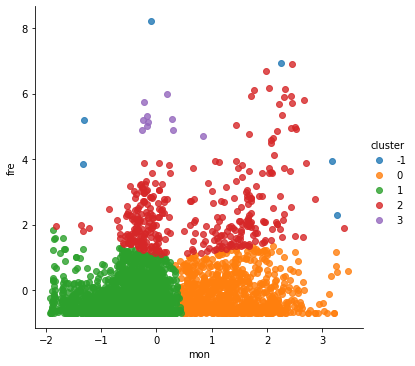

In [114]:
sns.lmplot('mon','fre', data=fm1, hue = 'cluster', fit_reg = False)